# <center>Text Mining project</center>
## <center>email exchanges among journalists</center>
### <center>Matteo Corona - 838138</center>

# PRELIMINARY STEPS

### Libraries importation

Let's import the necessary libraries and also download nltk packages for future usage.

In [28]:
# Importing the necessary libraries
import os                   # For interacting with the operating system
import re                   # Regular expressions for text manipulation
import nltk                 # Natural Language Toolkit for text processing
import gensim               # Gensim for topic modeling
import spacy                # SpaCy for natural language processing
import seaborn as sns       # Data visualization with Seaborn
import pandas as pd         # For data manipulation using DataFrames
import numpy as np          # Numerical computations
import matplotlib.pyplot as plt  # For data visualization

# NLTK modules
from nltk.corpus import stopwords        # Stopwords for text preprocessing
from nltk.tokenize import word_tokenize  # Tokenization of text
from nltk.probability import FreqDist    # Frequency distribution of words
from nltk.stem import WordNetLemmatizer  # Lemmatization of words
from nltk import pos_tag                 # Part-of-speech tagging for text analysis

# Other libraries
from wordcloud import WordCloud           # Generating word clouds
from itertools import combinations       # For creating combinations
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF vectorization
from sklearn.naive_bayes import MultinomialNB  # Multinomial Naive Bayes classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.metrics import accuracy_score, classification_report  # Model evaluation metrics
from sklearn.metrics import confusion_matrix  # Confusion matrix for classification
from sklearn.preprocessing import LabelEncoder  # Label encoding for target variable
from tensorflow.keras.preprocessing.text import Tokenizer  # Tokenization for deep learning
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Padding sequences
from tensorflow.keras.models import Sequential  # Sequential deep learning model
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization  # Model layers
from gensim.models import LdaModel  # Latent Dirichlet Allocation model
from gensim.corpora import Dictionary  # Dictionary for topic modeling
from gensim.models import CoherenceModel  # Model coherence evaluation
from gensim.matutils import hellinger  # Hellinger distance
import networkx as nx
import itertools

### 'ntlk' and 'spacy' packages download

In [2]:
# Downloading NLTK packages for text processing
nltk.download('punkt')                   # Download the NLTK tokenizer data
nltk.download('stopwords')               # Download NLTK stopwords for text preprocessing
nltk.download('wordnet')                # Download the WordNet lemmatizer data
nltk.download('omw-1.4')               # Download the Open Multilingual WordNet (OMW) data for multilingual support
nltk.download('averaged_perceptron_tagger')  # Download the NLTK averaged perceptron tagger data for part-of-speech tagging
# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to C:\Users\Matteo
[nltk_data]     Corona\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Matteo
[nltk_data]     Corona\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Matteo
[nltk_data]     Corona\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Matteo
[nltk_data]     Corona\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Matteo Corona\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Reading text files from folder

It is now time to read the data from the folder containing the emails. The folder contains 4 subfolders and emails are contained in these subfolders. It is necessary to iterate two times to correctly read al the file while saving the ids (corresponting to the file name of an email) and the labels (corresponding to the subfolder names).

In [3]:
import os

# Define the path folder
data_folder = 'Data'

# Initialize empty lists to store text, labels, and IDs
data = []       # To store the content of text files
labels = []     # To store the corresponding labels
ids = []        # To store the unique IDs extracted from file names

# Iterate over subfolders in the data folder, each representing a label
for label in os.listdir(data_folder):
    label_folder = os.path.join(data_folder, label)

    # Check if the item in the data folder is a directory (subfolder)
    if os.path.isdir(label_folder):

        # Iterate over files in the label folder
        for file in os.listdir(label_folder):

            # Check if the file has a .txt extension
            if file.endswith(".txt"):
                # Extract the unique identifier from the file name
                file_id = os.path.splitext(file)[0]

                # Open and read the content of the text file
                with open(os.path.join(label_folder, file), "r", encoding="ISO-8859-1") as f:
                    content = f.read()

                # Append the content, label, and file ID to their respective lists
                data.append(content)
                labels.append(label)
                ids.append(file_id)

In [4]:
# Creating and printing dataframe
df = pd.DataFrame({'ID': ids,'label': labels,'text': data})
df

,ID,label,text
0,14147,Crime,"\nArchive-name: ripem/faq\nLast-update: Sun, 7..."
1,14831,Crime,Approved: news-answers-request@MIT.EDU\nConten...
2,14832,Crime,Approved: news-answers-request@MIT.EDU\nConten...
3,14982,Crime,Message-ID: <1ppvai$l79@bilbo.suite.com>\nRepl...
4,14983,Crime,\n Some sick part of me really liked that ph...
...,...,...,...
9148,62615,Science,Distribution: world\nMessage-ID: <cshotton-180...
9149,62616,Science,\nJeffrey L. Cook sez;\n>>This object would no...
9150,62708,Science,Message-ID: <1tdqmvINN3q2@hp-col.col.hp.com>\n...
9151,62709,Science,Message-ID: <1t6dd1$11v@network.ucsd.edu>\nRef...


# TEXT PREPROCESSING

It's essential to clean and preprocess text data before analysis or modeling. This code defines a Python function for text preprocessing, which includes tasks like removing email addresses, replacing newline characters, tokenizing text, removing non-alphabetical characters, and lemmatization. Additionally, it removes common English stopwords to prepare text data for further analysis. The code uses the NLTK library for stopwords and tokenization and the WordNet lemmatizer for word normalization.

In [5]:
# Load English stopwords from NLTK
en_stopwords = set(stopwords.words('english'))

# Initializing a WordNet lemmatizer
word_lemmatizer = WordNetLemmatizer()

# Defining a regular expression to match non-alphabetical characters
regex = re.compile('[^a-zA-Z]')  # Removes non-alphabetical characters

# Defining a function for text preprocessing
def text_preprocessing(text):
    # Remove elements containing "@" (email addresses)
    text = re.sub(r'\S+@\S+', '', text)
    
    # Replacing newline characters '\n' with spaces
    text = text.replace("\n", " ")
    
    # Tokenizing the text into words
    tokenized_text = word_tokenize(text)
    
    # Initializing an empty list to store tokenized text without stopwords
    tokenized_text_w_stopwords = []

    # Iterating over each word in the tokenized text
    for word in tokenized_text:
        # Removing non-alphabetical characters and convert to lowercase
        word = regex.sub('', word.lower())
        
        # Checking if the word is longer than 3 characters and not in the stopwords list
        if len(word) > 3 and word not in en_stopwords:
            # Lemmatizing the word
            word = word_lemmatizer.lemmatize(word)
            
            # Appending the cleaned word to the list
            tokenized_text_w_stopwords.append(word)

    # Joining the cleaned words to form a cleaned text
    cleaned_text = " ".join(tokenized_text_w_stopwords)
    
    return cleaned_text

In [6]:
# Applying text_preprocessing() function to the dataframe
df['preprocessed_text'] = df['text'].apply(lambda x: text_preprocessing(x))
# Visualizing a part of the dataframe
df 

,ID,label,text,preprocessed_text
0,14147,Crime,"\nArchive-name: ripem/faq\nLast-update: Sun, 7...",archivename ripemfaq lastupdate posting still ...
1,14831,Crime,Approved: news-answers-request@MIT.EDU\nConten...,approved contenttype textxusenetfaq version ti...
2,14832,Crime,Approved: news-answers-request@MIT.EDU\nConten...,approved contenttype textxusenetfaq version ti...
3,14982,Crime,Message-ID: <1ppvai$l79@bilbo.suite.com>\nRepl...,messageid replyto nntppostinghost nimrodsuitec...
4,14983,Crime,\n Some sick part of me really liked that ph...,sick part really liked phrase actually merely ...
...,...,...,...,...
9148,62615,Science,Distribution: world\nMessage-ID: <cshotton-180...,distribution world messageid reference nntppos...
9149,62616,Science,\nJeffrey L. Cook sez;\n>>This object would no...,jeffrey cook object would interfere anyone enj...
9150,62708,Science,Message-ID: <1tdqmvINN3q2@hp-col.col.hp.com>\n...,messageid reference nntppostinghost hpctdkzcol...
9151,62709,Science,Message-ID: <1t6dd1$11v@network.ucsd.edu>\nRef...,messageid reference nntppostinghost lyapunovuc...


# DATA EXPLORATION

Exploratory Data Analysis (EDA) is a critical initial step in the data analysis process. In this section, we'll conduct an EDA on our dataset to gain a deeper understanding of its characteristics and prepare it for subsequent analysis.

In [7]:
# Preliminary Data Exploration
print("DataFrame dimensions:")  # Print the dimensions (shape) of the DataFrame
print(df.shape)  # Display the number of rows and columns in the DataFrame

# Basic Text Statistics
text_lengths = df['preprocessed_text'].apply(lambda x: len(x.split()))  # Calculate the word count for each preprocessed text
print("\nText length statistics:")  # Print text length statistics
print(text_lengths.describe())  # Display basic statistics (e.g., count, mean, std, min, max) of text lengths

DataFrame dimensions:
(9153, 4)

Text length statistics:
count    9153.000000
mean      142.641975
std       273.780346
min         0.000000
25%        48.000000
50%        81.000000
75%       142.000000
max      5567.000000
Name: preprocessed_text, dtype: float64


Let's visualize the distribution of text lenghts.

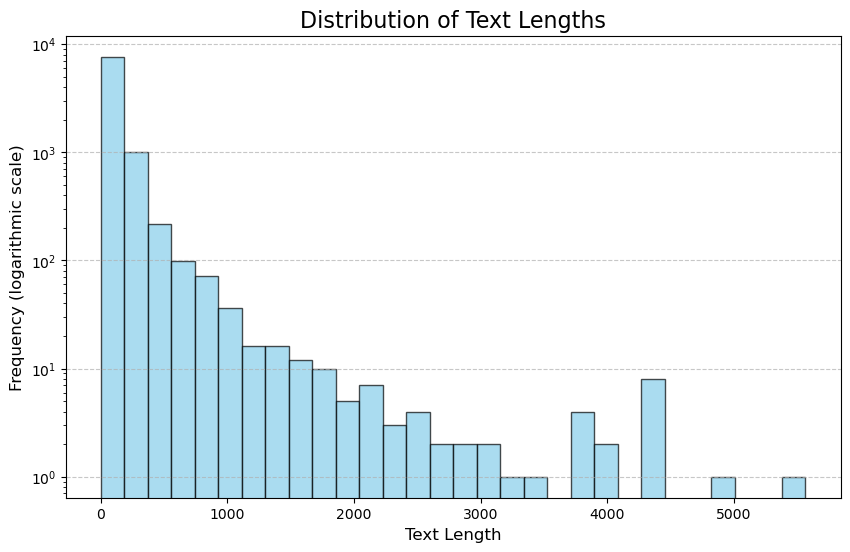

In [8]:
# Visualizing a distribution of text lengths
plt.figure(figsize=(10, 6))

# Creating a histogram of text lengths with specified parameters
plt.hist(text_lengths, bins=30, color='skyblue', edgecolor='black', alpha=0.7)  # Add alpha for transparency
plt.title('Distribution of Text Lengths', fontsize=16)
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Frequency (logarithmic scale)', fontsize=12)
plt.xticks(fontsize=10)  # X-axis text size
plt.yticks(fontsize=10)  # Y-axis text size

# Adding a dashed grid on the y-axis for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Applying logarithmic scaling to the y-axis for better visualization of the frequency distribution
plt.yscale('log')

# Showing and saving the plot
plt.savefig('text_length_distr.png', dpi=300, bbox_inches='tight')
plt.show()

Let's visualize the label distribution. We can clearly see that the four classes are not equally represented. This will be considered when we will build the text classification model.

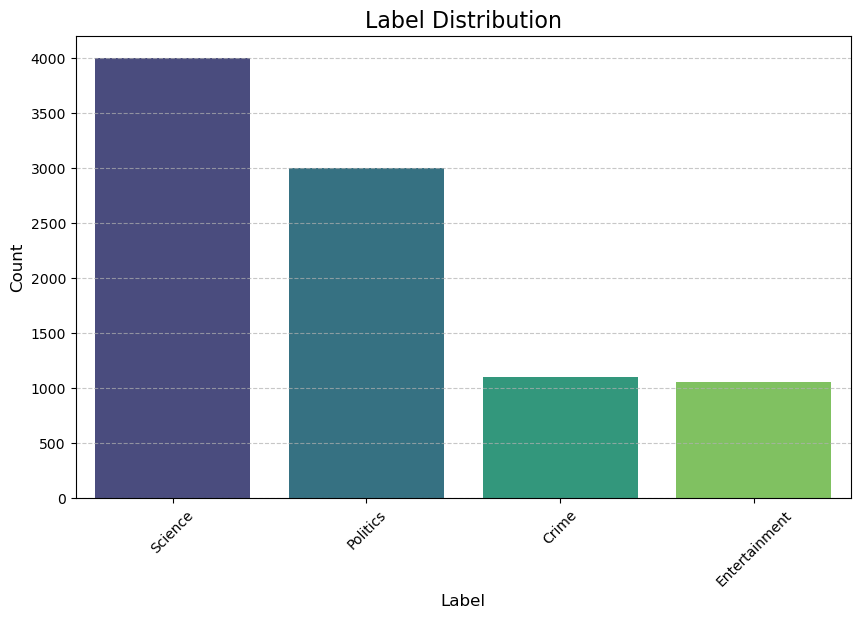

In [9]:
# Calculating the distribution of labels in the original order
label_distribution = df['label'].value_counts()

# Creating a bar plot to visualize the label distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_distribution.index, y=label_distribution.values, palette='viridis')
plt.title('Label Distribution', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotates x-axis labels and adjust text size
plt.yticks(fontsize=10)  # Text size on the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding a dashed grid
plt.savefig('label_distr.png', dpi=300, bbox_inches='tight')
plt.show()

Let's see which are the most common words in the emails and also visualize some wordscloud (one for each label).

In [10]:
# Defining a function to filter words based on desired POS tags
def filter_words_by_pos(word_list, pos_tags):
    filtered_words = []
    tagged_words = pos_tag(word_list)
    
    # Iterate over each word and its POS tag
    for word, tag in tagged_words:
        if tag in pos_tags:
            filtered_words.append(word)
    return filtered_words

# Calculating the most common words
all_words = ' '.join(df['preprocessed_text'])
words = word_tokenize(all_words)
fdist = FreqDist(words)
common_words = fdist.most_common(30)

# List of desired POS tags (e.g., nouns, adjectives)
desired_pos_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS']

# Filtering common words based on desired POS tags
common_words_filtered = filter_words_by_pos([word for word, _ in common_words], desired_pos_tags)

print("\nMost Common Words (Filtered by POS):")
for word, freq in common_words:
    if word in common_words_filtered:
        print(f"{word}: {freq}")


Most Common Words (Filtered by POS):
people: 7154
article: 7076
government: 4934
time: 4382
system: 3956
chip: 3300
thing: 3095
year: 3051
encryption: 2930
want: 2864
state: 2840
many: 2835
good: 2659
number: 2650
much: 2640
information: 2627


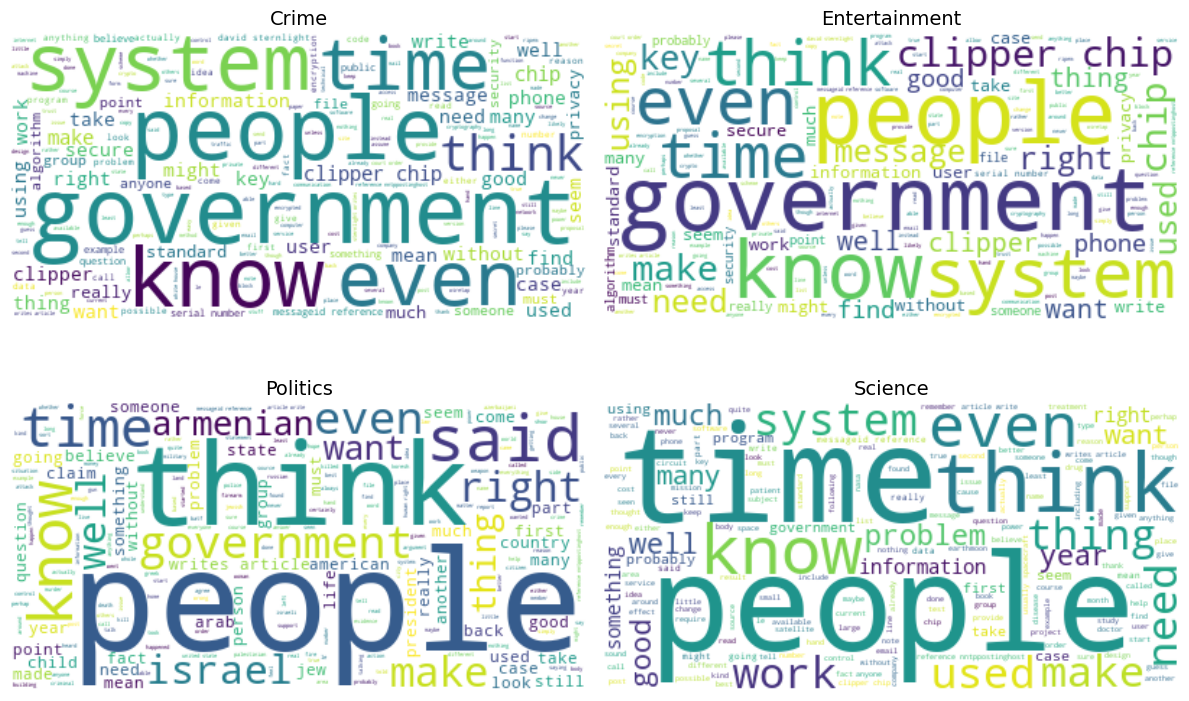

In [12]:
# Creating a dictionary to store word clouds for each label
label_wordclouds = {}

# Labels
labels = df['label'].unique()

# Creating a 2x2 grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Loop to calculate and display the Word Clouds for each label
for i, label in enumerate(labels):
    # Concatenating preprocessed text for each label
    label_words = ' '.join(df[df['label'] == label]['preprocessed_text'])
    
    # Generating a Word Cloud for the label
    label_wordcloud = WordCloud(width=400, height=200, background_color='white').generate(label_words)
    
    # Storing the Word Cloud in the dictionary
    label_wordclouds[label] = label_wordcloud

    # Plotting the Word Cloud in the corresponding subplot
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.imshow(label_wordcloud, interpolation='bilinear')
    ax.set_title(label, fontsize=14)
    ax.axis('off')

# Ensuring proper layout and displaying the Word Clouds
plt.tight_layout()
plt.savefig('EDA_word_clouds.png', dpi=300, bbox_inches='tight')
plt.show()

# TEXT PREPROCESSING | dealing with multi-class

Let's analyze the overlap between the labels by counting the number of ids classified in multiple labels at the same time.

In [13]:
# Creating a dictionary to store the count of IDs for each combination of labels
label_combinations_count = {}

# Unique labels from the DataFrame
unique_labels = df['label'].unique()

# Iterating through all possible combinations of labels
for r in range(1, min(len(unique_labels), 4) + 1):  # Consider combinations of 1, 2, 3, and 4 labels
    label_combinations = combinations(unique_labels, r)

    # Iterating through each combination of labels
    for combination in label_combinations:
        combination = set(combination)

        # Initializing a set to store the IDs that appear in all selected labels within the combination
        common_ids = None

        # Finding the common IDs that appear in all selected labels within the combination
        for label in combination:
            if common_ids is None:
                common_ids = set(df[df['label'] == label]['ID'])
            else:
                common_ids.intersection_update(df[df['label'] == label]['ID'])

        # Counting the number of unique IDs that appear in all selected labels within this combination
        ids_count = len(common_ids)

        # Creating a tuple representing the combination of labels
        combination_key = tuple(sorted(combination))

        # Updating the dictionary with the count of IDs for this combination
        if combination_key in label_combinations_count:
            label_combinations_count[combination_key] += ids_count
        else:
            label_combinations_count[combination_key] = ids_count

# Printing the count of IDs for each combination of labels
for combination, ids_count in label_combinations_count.items():
    print(f'Labels: {", ".join(combination)}, Number of IDs: {ids_count}')

Labels: Crime, Number of IDs: 1100
Labels: Entertainment, Number of IDs: 1053
Labels: Politics, Number of IDs: 3000
Labels: Science, Number of IDs: 4000
Labels: Crime, Entertainment, Number of IDs: 1053
Labels: Crime, Politics, Number of IDs: 0
Labels: Crime, Science, Number of IDs: 1100
Labels: Entertainment, Politics, Number of IDs: 0
Labels: Entertainment, Science, Number of IDs: 1053
Labels: Politics, Science, Number of IDs: 267
Labels: Crime, Entertainment, Politics, Number of IDs: 0
Labels: Crime, Entertainment, Science, Number of IDs: 1053
Labels: Crime, Politics, Science, Number of IDs: 0
Labels: Entertainment, Politics, Science, Number of IDs: 0
Labels: Crime, Entertainment, Politics, Science, Number of IDs: 0


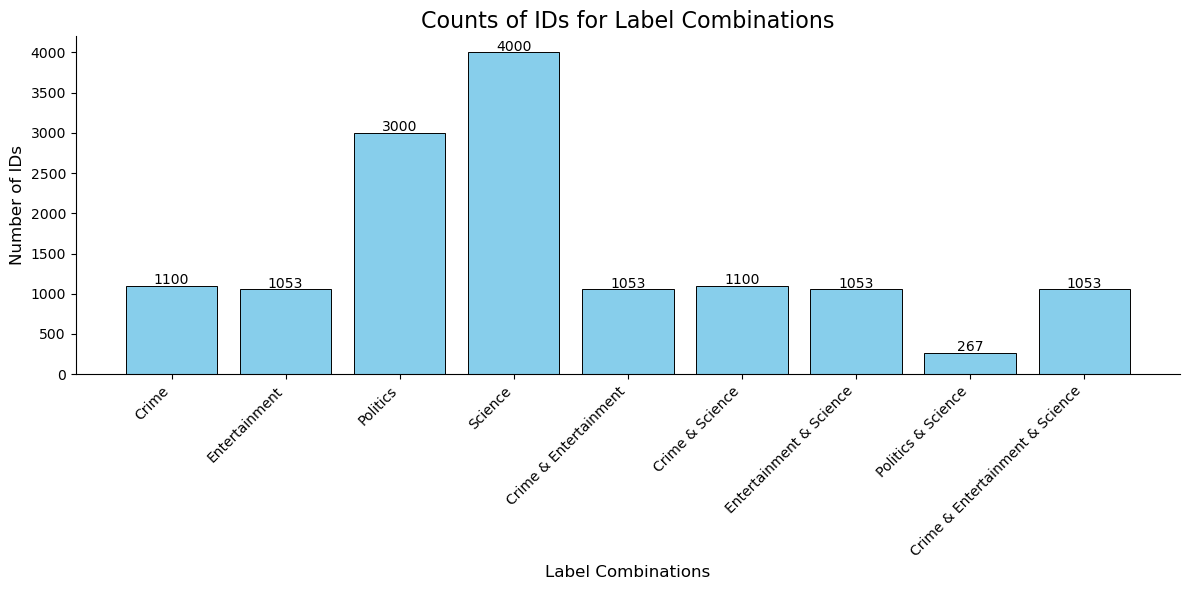

In [14]:
# Extracting the combinations and counts from the dictionary, excluding combinations with zero counts
combinations = [' & '.join(combination) if combination else 'No Label' for combination, count in label_combinations_count.items() if count > 0]
counts = [count for combination, count in label_combinations_count.items() if count > 0]

# Creating a bar chart with better aesthetics
plt.figure(figsize=(12, 6))
bars = plt.bar(combinations, counts, color='skyblue', edgecolor='black', linewidth=0.7)

# Adding labels and titles
plt.title('Counts of IDs for Label Combinations', fontsize=16)
plt.xlabel('Label Combinations', fontsize=12)
plt.ylabel('Number of IDs', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Adding data labels on top of the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 20, str(count), ha='center', fontsize=10)

# Removing the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjusting layout and show the plot
plt.tight_layout()
plt.savefig('ids_count_label_combinations.png', dpi=300, bbox_inches='tight')
plt.show()

A decision was made to filter and remove data points that are labeled under multiple classes. This choice was made with specific objectives in mind and is outlined as follows:

1. **Understanding Data Distribution:** Initially, the analysis aimed to understand the distribution of data points among different classes or labels. This step involved determining how many files were labeled under each specific class, such as 'Crime,' 'Entertainment,' 'Science,' and others.

2. **Handling Multi-labeled Data Points:** It was observed that some data points were labeled under multiple classes simultaneously, in this case, 'Crime,' 'Entertainment,' and 'Science.' To ensure a cleaner and more focused dataset, a decision was made to remove these multi-labeled data points from all classes except one. 

3. **Risk Assessment:** This approach comes with a potential risk of mislabeling the data. For example, if '14147.txt' was initially labeled as 'Science' and later repeated in other classes like 'Crime' and 'Entertainment,' removing it from 'Science' could lead to mislabeling. However, it's important to note that 'Science' and 'Politics 'already contains a substantial number of entries, making it a robust class for model training. For this reason the choice of label to keep is done by penalizing those two classes. There is no ambiguity since there are no ids labelled into four classes at the same time and only 267 ids labelled at the same time in 'Politics' and 'Science'.

4. **Objective Alignment:** The decision to remove multi-labeled data points aligns with the primary objective of focusing on specific class categories. By removing data points from classes other than the most relevant one, the analysis aims to provide a cleaner and more targeted dataset for subsequent tasks.

In summary, the choice to remove data points labeled under multiple classes was driven by the goal of improving data quality and creating a dataset that is well-suited for training and analysis. While there is a potential risk of mislabeling, it is mitigated by the presence of classes with ample data, ensuring that the analysis remains robust and informative. This approach allows for a more focused exploration of individual class characteristics and patterns.

Let's see how many **unique** data each label has.

In [15]:
# Defining a list of unique labels
unique_labels = df['label'].unique()

# Creating a dictionary to store the unique IDs for each label
unique_ids_per_label = {label: set() for label in unique_labels}

# Iterating through the rows of the DataFrame
for index, row in df.iterrows():
    label = row['label']
    unique_id = row['ID']
    
    # Checking if the unique_id is not in any other label's set
    if all(unique_id not in unique_ids_per_label[other_label] for other_label in unique_labels if other_label != label):
        unique_ids_per_label[label].add(unique_id)

# Printing the number of unique IDs for each label
for label, unique_id_set in unique_ids_per_label.items():
    print(f'Label: {label}, Number of Unique IDs: {len(unique_id_set)}')

Label: Crime, Number of Unique IDs: 1100
Label: Entertainment, Number of Unique IDs: 0
Label: Politics, Number of Unique IDs: 3000
Label: Science, Number of Unique IDs: 2633


It was observed that the 'Entertainment' class had no unique data points exclusive to its category. This means that every data point labeled as 'Entertainment' was also labeled as another class, sharing its identity with one or more different categories. 

Given this observation, I made the decision to exclude the 'Entertainment' label from the analysis. The rationale behind this decision was twofold:

1. **Data Exclusivity**: The absence of unique data points for the 'Entertainment' class suggested that all data points labeled as 'Entertainment' were also present in other categories. This lack of exclusivity implied that the 'Entertainment' label did not contribute any distinct content that was not already covered by the other labels.

2. **Eliminating Variance**: By not considering the 'Entertainment' label, we eliminated the potential variance that could have been introduced by duplicate data. Since all 'Entertainment' data points were duplicated in other categories, their presence in the analysis would not have added new insights but could have skewed results or introduced noise.

Therefore, the approach was to focus the analysis on the labels that contained unique data points, ensuring that the modeling and insights are based on distinct and informative content.

In [16]:
# Step 1: Group by unique IDs, aggregating labels and keeping the first preprocessed_text
grouped_df = df.groupby('ID').agg({
    'label': lambda x: ' '.join(x),  # Combining all labels into a single string
    'preprocessed_text': 'first'     # Keeping the first preprocessed_text
}).reset_index()

# Step 2: For each unique ID, keeping only the first label (which is not 'politics' or 'science')
def choose_label(labels):
    labels = labels.split()
    for label in labels:
        if label not in ['Politics', 'Science']:
            return label
    return labels[0]

grouped_df['label'] = grouped_df['label'].apply(choose_label)

# Step 3: Creating a new dataset with unique IDs, corresponding labels, and preprocessed_text
new_df = grouped_df[['ID', 'label', 'preprocessed_text']]

# Now, new_df will contain unique IDs with their corresponding labels and preprocessed_text
new_df

,ID,label,preprocessed_text
0,124146,Politics,nntppostinghost acvax nntppostinguser cvads la...
1,14147,Crime,archivename ripemfaq lastupdate posting still ...
2,14831,Crime,approved contenttype textxusenetfaq version ti...
3,14832,Crime,approved contenttype textxusenetfaq version ti...
4,14982,Crime,messageid replyto nntppostinghost nimrodsuitec...
...,...,...,...
6728,77820,Politics,article mark kaufman writes arab army attack i...
6729,77821,Politics,article chris metcalfe writes article joachim ...
6730,77822,Politics,distribution world messageid reference replyto...
6731,77823,Politics,messageid reference replyto nntppostinghost kl...


Let's now visualize the new label distribution

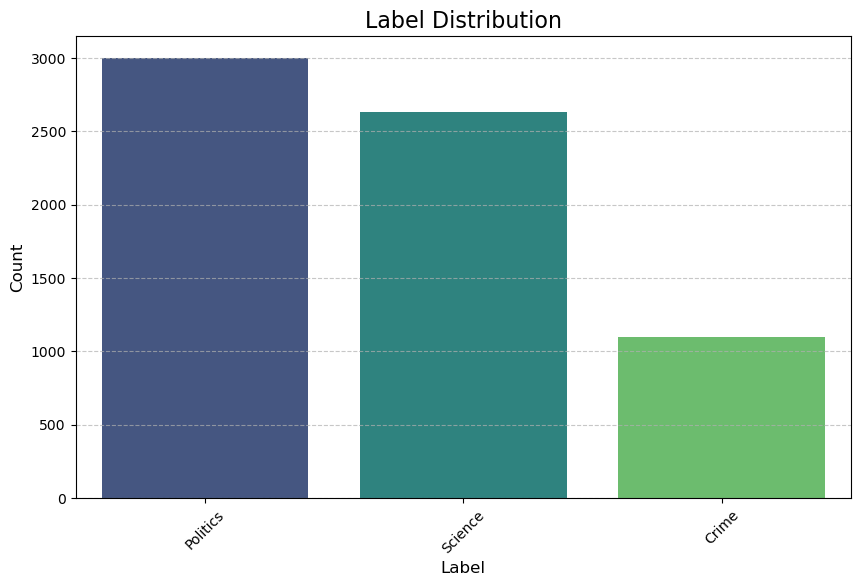

In [17]:
# Calculating the distribution of labels in the original order
label_distribution = new_df['label'].value_counts()

# Creating a bar plot to visualize the distribution of labels
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=label_distribution.index, y=label_distribution.values, palette='viridis')  # Create a bar plot
plt.title('Label Distribution', fontsize=16)  # Set the plot title
plt.xlabel('Label', fontsize=12)  # Set the label for the x-axis
plt.ylabel('Count', fontsize=12)  # Set the label for the y-axis
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels and adjust text size
plt.yticks(fontsize=10)  # Set the text size for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a dashed grid for the y-axis
plt.savefig('new_label_distr.png', dpi=300, bbox_inches='tight')
plt.show()  # Display the plot

# TEXT REPRESENTATION

### TF-IDF Representation
In this text classification problem, I utilize the Term Frequency-Inverse Document Frequency (TF-IDF) representation as a fundamental preprocessing step.

**Term Frequency (TF):** TF measures how frequently a specific word appears within an individual document. For a classification task, this component is crucial because it helps us gauge the significance of words within each document. Words that occur frequently are likely to carry valuable information regarding the document's topic or category.

**Inverse Document Frequency (IDF):** IDF evaluates the uniqueness or rarity of a word across our entire dataset of documents. In our context, this aspect plays a pivotal role in distinguishing words that are truly indicative of a document's category from those that are common across various categories.

The TF-IDF representation combines both TF and IDF to serve two primary objectives:

1. **Weighting Relevance:** TF-IDF assigns a weight to each word in every document based on how often it appears within that document and how rare it is across the entire corpus. Consequently, words that frequently occur within a specific document but are rare in others receive higher TF-IDF scores, indicating their potential significance in determining the document's category.

2. **Dimensionality Reduction:** Transforming text data into TF-IDF representations reduces its dimensionality while preserving the most informative aspects. This transformation simplifies the data and enhances the performance of machine learning algorithms used for classification.

The rationale behind employing TF-IDF is that this representation empowers us to focus on words that are not only frequent within a document but also distinctive across categories. This ensures that our classification model can identify relevant patterns and relationships between words and document categories, ultimately improving its accuracy and effectiveness in classifying texts. By leveraging TF-IDF, we aim to enhance the quality of our text data and facilitate more accurate and reliable text classification results.

In [18]:
# Splitting the DataFrame into training and test sets
X = new_df['preprocessed_text']  # Load the text data
y = new_df['label']  # Load the labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a TF-IDF vectorizer to convert text into numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=8000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [19]:
# Printing the shape of the TF-IDF matrices
print("Shape of the TF-IDF matrix for the training set:", X_train_tfidf.shape)
print("Shape of the TF-IDF matrix for the test set:", X_test_tfidf.shape)

Shape of the TF-IDF matrix for the training set: (5386, 8000)
Shape of the TF-IDF matrix for the test set: (1347, 8000)


# TEXT CLASSIFICATION

### Model Training and Evaluation

Let's train and evaluate multiple machine learning models for our text classification task. The goal is to determine which model performs the best in classifying text documents into predefined categories.

#### Explored models

Three different models have been explored:

1. **Multinomial Naive Bayes**: A probabilistic classifier based on the Bayes' theorem that is commonly used for text classification tasks.

2. **Logistic Regression**: A linear model used for binary and multiclass classification tasks, known for its simplicity and interpretability.

3. **Random Forest**: An ensemble learning method that combines multiple decision trees to improve classification performance.

#### Model Training and Evaluation Process

- For each model, I first train it on the training data using the TF-IDF transformed features.

- After training, I use the trained model to make predictions on the test data.

- I calculate the accuracy of each model, which measures the proportion of correctly classified instances.

- Additionally, I generate a classification report for each model, providing precision, recall, and F1-score for each class or label. This report offers a more detailed assessment of model performance.

The results help choosing the best-performing model for the text classification task, considering both accuracy and other performance metrics.

In [20]:
# Defining a list of models to try
models = [
    ("Multinomial Naive Bayes", MultinomialNB()),
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier())
]

# Training and evaluate each model
for model_name, model in models:
    # Fit the model on the TF-IDF transformed training data
    model.fit(X_train_tfidf, y_train)
    
    # Predicting labels for the test data
    y_pred = model.predict(X_test_tfidf)
    
    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generating a classification report
    report = classification_report(y_test, y_pred)
    
    # Printing model performance metrics
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification report:\n {report}")
    print("\n")

Model: Multinomial Naive Bayes
Accuracy: 0.94
Classification report:
               precision    recall  f1-score   support

       Crime       1.00      0.76      0.87       219
    Politics       0.93      0.98      0.95       595
     Science       0.93      0.97      0.95       533

    accuracy                           0.94      1347
   macro avg       0.95      0.90      0.92      1347
weighted avg       0.94      0.94      0.94      1347



Model: Logistic Regression
Accuracy: 0.95
Classification report:
               precision    recall  f1-score   support

       Crime       0.99      0.81      0.89       219
    Politics       0.95      0.97      0.96       595
     Science       0.92      0.98      0.95       533

    accuracy                           0.95      1347
   macro avg       0.95      0.92      0.93      1347
weighted avg       0.95      0.95      0.94      1347



Model: Random Forest
Accuracy: 0.91
Classification report:
               precision    recall  f1-

The 'LogisticRegression' model appears to be the best-performing: let's visualize a confuzion matrix.

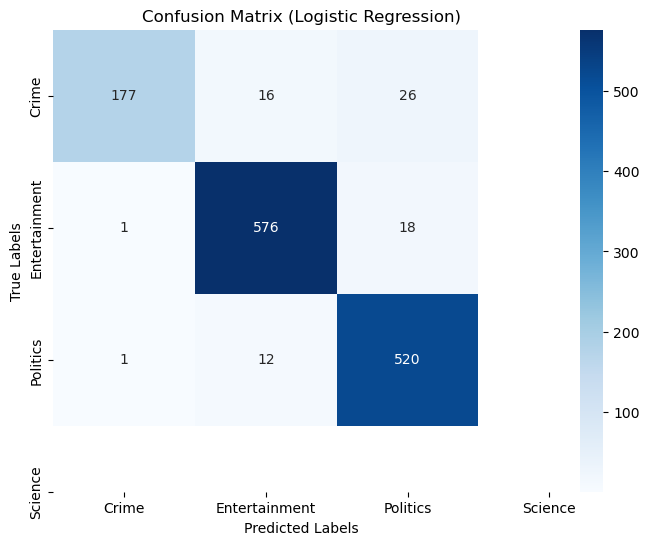

In [21]:
# Training the Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)

# Making predictions on the test set
y_pred_logistic = logistic_regression_model.predict(X_test_tfidf)

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Logistic Regression)')
plt.savefig('conf_matric_LogReg.png', dpi=300, bbox_inches='tight')
plt.show()

### Deep Learning Model

For this analysis, I decided to explore the application of deep learning, specifically a Bidirectional LSTM (Long Short-Term Memory) model, for text classification. This decision was made to complement and compare the performance of traditional machine learning models such as Logistic Regression and Multinomial Naive Bayes (tried before).

Deep learning models, like Bidirectional LSTMs, have demonstrated strong capabilities in understanding and processing sequential data, making them well-suited for natural language processing tasks.

This comparative analysis allows to evaluate whether the additional computational complexity and training time associated with deep learning models result in superior classification accuracy and generalization on our specific text dataset. Additionally, it offers insights into the most appropriate modeling approach for our task, considering both performance and computational efficiency.

Ultimately, this comparative study serves to inform the selection of the most suitable model for the text classification problem, taking into account the trade-offs between traditional machine learning techniques and more advanced deep learning architectures.

In [22]:
# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Tokenizing text data
tokenizer = Tokenizer(num_words=8000)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure consistent input length
max_sequence_length = 100  # Choose an appropriate value
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

# Building the LSTM model
model = Sequential()
model.add(Embedding(8000, 128, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64, return_sequences=False)))  # Change to return_sequences=False
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer for multi-class classification

# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Change loss function

# Training the model
batch_size = 64
epochs = 10
model.fit(X_train_padded, y_train_encoded, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluating the model
y_pred_prob = model.predict(X_test_padded)
y_pred_encoded = np.argmax(y_pred_prob, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
report = classification_report(y_test_encoded, y_pred_encoded, target_names=label_encoder.classes_)
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification report:\n {report}")

Epoch 1/10
76/76 [==============================] - 37s 440ms/step - loss: 0.5793 - accuracy: 0.7557 - val_loss: 0.7804 - val_accuracy: 0.7829
Epoch 2/10
76/76 [==============================] - 43s 563ms/step - loss: 0.1380 - accuracy: 0.9575 - val_loss: 0.5541 - val_accuracy: 0.9017
Epoch 3/10
76/76 [==============================] - 52s 690ms/step - loss: 0.0615 - accuracy: 0.9835 - val_loss: 0.3524 - val_accuracy: 0.9054
Epoch 4/10
76/76 [==============================] - 55s 722ms/step - loss: 0.0545 - accuracy: 0.9833 - val_loss: 0.3390 - val_accuracy: 0.8720
Epoch 5/10
76/76 [==============================] - 55s 726ms/step - loss: 0.0294 - accuracy: 0.9934 - val_loss: 0.4875 - val_accuracy: 0.8534
Epoch 6/10
76/76 [==============================] - 55s 721ms/step - loss: 0.0244 - accuracy: 0.9934 - val_loss: 0.3308 - val_accuracy: 0.9072
Epoch 7/10
76/76 [==============================] - 55s 728ms/step - loss: 0.0211 - accuracy: 0.9942 - val_loss: 0.3370 - val_accuracy: 0.8961

# Topic Modeling

## Explanation of LDA Topic Modeling and Model Selection

In this section, we employ Latent Dirichlet Allocation (LDA) topic modeling to extract meaningful topics from text data within each label category. LDA is a probabilistic model that allows us to uncover hidden topics in a collection of documents, making it a valuable tool for text analysis.

### Step 1: Model Selection

To determine the optimal number of topics for each label category, we perform model selection. This involves training LDA models with different numbers of topics, ranging from a minimum to a maximum value (defined as `min_topics` and `max_topics`), for each label category present in the dataset.

### Step 2: Metrics and Interpretation

We evaluate each LDA model based on multiple metrics, including perplexity, coherence score, and topic overlap. Perplexity measures how well the model predicts the data, while coherence score assesses the interpretability of the topics. Topic overlap provides insights into how distinct the identified topics are.

For each label category, we select the LDA model with the best combination of these metrics. Finally, we present the top terms associated with the identified topics in the best model for each label.

This approach allows us to uncover the most relevant and coherent topics within each label category, providing valuable insights into the content of the text data.

In [29]:
def extract_nouns_adjectives(text):
    # Extracts nouns, adjectives, and proper nouns from the input text using spacy.
    doc = nlp(text)
    meaningful_words = []
    for token in doc:
        if token.pos_ in ["NOUN", "ADJ", "PROPN"]:
            meaningful_words.append(token.text)
    return meaningful_words

def calculate_coherence(lda_model, corpus, dictionary, texts):
    # Calculates the coherence score for an LDA topic model.
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

def calculate_topic_overlap(lda_model):
    # Calculates the topic overlap score for an LDA topic model.
    num_topics = lda_model.num_topics
    overlap_scores = []
    
    # Converting topics to probability distributions
    topic_distributions = [lda_model.get_topic_terms(topic) for topic in range(num_topics)]
    
    for i, j in combinations(range(num_topics), 2):
        # Converting the term IDs to lists for each topic
        terms_i = [term[0] for term in topic_distributions[i]]
        terms_j = [term[0] for term in topic_distributions[j]]
        
        # Calculating Hellinger distance between the two topics
        overlap_score = hellinger(terms_i, terms_j)
        overlap_scores.append(overlap_score)

    # Calculating average Hellinger distance
    if overlap_scores:
        average_overlap = sum(overlap_scores) / len(overlap_scores)
    else:
        average_overlap = 0.0

    return 100 - average_overlap

In [30]:
def find_best_lda_model(df, label, min_topics, max_topics):
    # Filter the DataFrame by label
    subset_df = df[df['label'] == label]

    # Assuming 'preprocessed_text' column already contains tokenized text as strings
    tokenized_text = [text.split() for text in subset_df['preprocessed_text']]

    # Creating a dictionary and a corpus
    dictionary = Dictionary(tokenized_text)
    corpus = [dictionary.doc2bow(text) for text in tokenized_text]

    best_model = None
    best_perplexity = float('inf')
    best_num_topics = 0
    best_coherence_score = -1  # Initialize with a low value
    best_overlap_score = -1  # Initialize with a low value

    # Iterating through different numbers of topics
    for num_topics in range(min_topics, max_topics + 1):
        lda_model = LdaModel(corpus,
                             num_topics=num_topics,
                             id2word=dictionary,
                             passes=15,
                             chunksize=10000,
                             random_state=100,
                             iterations=500,
                             alpha='auto',
                             eta="auto",
                             eval_every=None)
        
        # Calculating perplexity
        perplexity = lda_model.log_perplexity(corpus)

        # Calculating coherence
        coherence_score = calculate_coherence(lda_model, corpus, dictionary, tokenized_text)

        # Calculating topic overlap using Hellinger distance
        overlap_score = calculate_topic_overlap(lda_model)

        # Printing metrics for each model
        print(f"Number of Topics: {num_topics}")
        print(f"Perplexity: {perplexity}")
        print(f"Coherence Score: {coherence_score}")
        print(f"Overlap Score: {overlap_score}")

        # Updating the best model if it has better metrics
        if perplexity < best_perplexity and coherence_score > best_coherence_score and overlap_score > best_overlap_score:
            best_perplexity = perplexity
            best_model = lda_model
            best_num_topics = num_topics
            best_coherence_score = coherence_score
            best_overlap_score = overlap_score

    # Printing the topics for the best model
    print(f"Topics for Label {label} (Best Model with {best_num_topics} Topics):")
    for topic_num, topic_words in best_model.show_topics(num_topics=best_num_topics, num_words=10, formatted=False):
        topic_words = [word for word, _ in topic_words]
        meaningful_words = extract_nouns_adjectives(' '.join(topic_words))
        topic_words = ', '.join(meaningful_words)
        print(f"Topic {topic_num + 1}: {topic_words}\n")

    # Returning the best model and its metrics
    return best_model, best_perplexity, best_coherence_score, best_overlap_score

In [33]:
# Defining the minimum and maximum number of topics to consider
min_topics = 4
max_topics = 12

unique_labels = new_df['label'].unique()

best_lda_models = {}  # Dictionary to store the best LDA models

for label in unique_labels:
    best_lda_model, best_perplexity, best_coherence_score, best_overlap_score = find_best_lda_model(new_df, label, min_topics, max_topics)
    
    # Printing the best metrics for the current label
    print(f"Best Model Metrics for Label {label}:")
    print(f"Perplexity: {best_perplexity}")
    print(f"Coherence Score: {best_coherence_score}")
    print(f"Overlap Score: {best_overlap_score}")
    print("-" * 50)  # Separator for different labels
    
    # Storing the best LDA model in the dictionary
    best_lda_models[label] = best_lda_model

Number of Topics: 4
Perplexity: -8.281003851249954
Coherence Score: 0.41335930229670576
Overlap Score: 42.03344590478955
Number of Topics: 5
Perplexity: -8.261089089842159
Coherence Score: 0.4360442681748406
Overlap Score: 40.39054630545287
Number of Topics: 6
Perplexity: -8.264730194325496
Coherence Score: 0.4251414851843595
Overlap Score: 42.71882360365375
Number of Topics: 7
Perplexity: -8.266627375788465
Coherence Score: 0.420501912415825
Overlap Score: 32.64858585587946
Number of Topics: 8
Perplexity: -8.267193313286997
Coherence Score: 0.4101305721235348
Overlap Score: 36.568983160266654
Number of Topics: 9
Perplexity: -8.2628391330857
Coherence Score: 0.4262673742411043
Overlap Score: 38.3191514184654
Number of Topics: 10
Perplexity: -8.273251290000955
Coherence Score: 0.38787276113336244
Overlap Score: 29.140389280404662
Number of Topics: 11
Perplexity: -8.254678800340807
Coherence Score: 0.38308505109148394
Overlap Score: 27.06858861458373
Number of Topics: 12
Perplexity: -8.2

Let's now visualize the topics for one of the labels (Science):

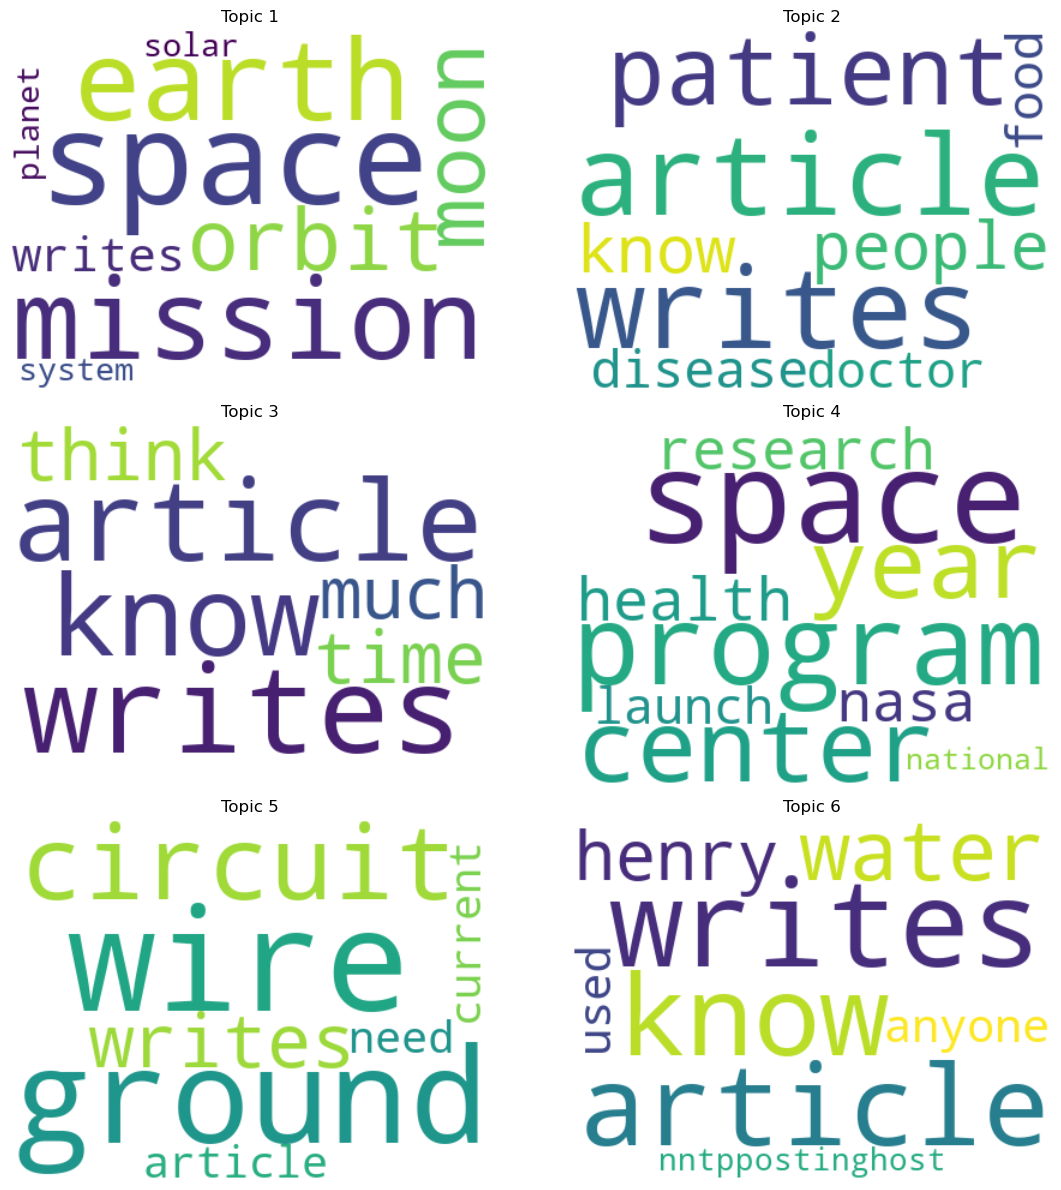

In [72]:
# Access the LDA model for the "Science" label
best_lda_model_science = best_lda_models["Science"]

# Retrieve the topics for this model
topics = best_lda_model_science.show_topics(num_topics=6, num_words=10)  # Use 6 topics for a 3x2 grid

# Create a 3x2 grid for plotting
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.ravel()

# Plot Topics with corrected word format
for i, topic in enumerate(topics):
    words = topic[1]
    topic_words = [''.join([word[0] for word in words])]  # Concatenate letters into words
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate(' '.join(topic_words))
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f"Topic {topic[0] + 1}")
    axes[i].axis("off")

# Ensure any remaining subplots are hidden
for i in range(6, len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.savefig('science_topics.png', dpi=300, bbox_inches='tight')
plt.show()

In [73]:
# Extracting topics as sets of words
topics = best_lda_model_science.show_topics(num_topics=6, num_words=10)

# Defining an empty list to store the converted topics
converted_topics = []

# Loop through the topics and convert them to sets of words
for topic in topics:
    topic_words = set()
    # Splitting the topic text by space and add the words to the set
    for word_prob_pair in topic[1].split('+'):
        word = word_prob_pair.split('*')[1].strip().strip('"')
        topic_words.add(word)
    converted_topics.append(topic_words)

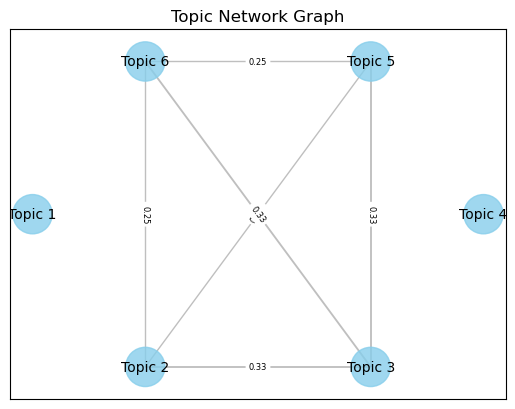

In [92]:
# Function to calculate Jaccard similarity
def calculate_jaccard_similarity(topic1, topic2):
    intersection = len(set(topic1).intersection(set(topic2)))
    union = len(set(topic1).union(set(topic2)))
    return intersection / union

# Creating a network graph and add nodes for each topic
G = nx.Graph()

# Adding nodes for each topic
for i, topic in enumerate(converted_topics):
    G.add_node(i, label=f"Topic {i+1}", words=', '.join(topic))

# Calculating Jaccard similarities between topics and add edges to the graph
for pair in itertools.combinations(range(len(converted_topics)), 2):
    i, j = pair
    similarity = calculate_jaccard_similarity(converted_topics[i], converted_topics[j])
    if similarity > 0.2:
        G.add_edge(i, j, weight=similarity)

# Drawing and display the network graph with improved styling
pos = nx.shell_layout(G, scale=2)  # Using shell_layout for better node positioning

# Drawing nodes and edges with improved styling
node_sizes = [800 for _ in G.nodes()] 
edge_widths = [edata['weight']*4 for u, v, edata in G.edges(data=True)] 
edge_colors = ['gray' for _ in G.edges()] 
node_colors = 'skyblue'
edge_labels = {(u, v): f'{edata["weight"]:.2f}' for u, v, edata in G.edges(data=True)}

# Drawing nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)

# Drawing edges
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors, alpha=0.5)

# Drawing edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

# Adding topic labels
topic_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=topic_labels, font_size=10)

plt.axis('on')
plt.title('Topic Network Graph')
plt.savefig('topic_network_science.png', dpi=300, bbox_inches='tight')
plt.show()